# Seeds Dataset with Support Vectore Machines
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Seeds_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/seeds_dataset.csv)

In [83]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from yellowbrick.features import ParallelCoordinates
from matplotlib.colors import ListedColormap
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix


In [84]:
#reading csv file
names = ['Area','Perimeter','Compactness','length_kernel','width_kernel','asy_coefficient','len_kernel_groove','target']
data = pd.read_csv('../../Lab1/Romil/Data/seeds_dataset.csv',header=None,names=names)
data.head()

,Area,Perimeter,Compactness,length_kernel,width_kernel,asy_coefficient,len_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [85]:
#Selecting all features
X = data.drop(['target'], axis=1).values
y = data.target.values

In [86]:
#Selecting Area and asymmetric coefficient as main features
X = data.drop(['target','Perimeter','Compactness','length_kernel','width_kernel','len_kernel_groove'],axis=1).values
y = data.target.values

In [87]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scaling train and testing datasets

In [88]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [89]:
#Made a model object having linear kernel
model = svm.SVC(kernel = 'linear',C = 100, gamma = 1)

In [90]:
#Fitting the model with standardized data
model.fit(X_train_std,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### checking the model's parameters

In [92]:
model.coef_

array([[-5.70375136, -1.12220581],
       [ 4.24272605, -1.17348697],
       [ 2.82700858, -0.43414391]])

In [93]:
model.intercept_

array([2.68404132, 2.60505466, 0.56775464])

### Checking the accuracy

In [97]:
model.score(X_test_std,y_test)

0.9206349206349206

### Visualization

In [94]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-4,4)
yy = a * xx - (model.intercept_[0]) / w[1]

w1 = model.coef_[1]
a1 = -w1[0] / w1[1]
xx1 = np.linspace(-4,4)
yy1 = a1 * xx1 - (model.intercept_[1]) / w1[1]

w2 = model.coef_[2]
a2 = -w2[0] / w2[1]
xx2 = np.linspace(-4,4)
yy2 = a2 * xx2 - (model.intercept_[2]) / w2[1]


In [95]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

yy_down1 = yy1 - np.sqrt(1 + a1 ** 2) * margin
yy_up1 = yy1 + np.sqrt(1 + a1 ** 2) * margin

yy_down2 = yy2 - np.sqrt(1 + a2 ** 2) * margin
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin

(-4.4, 4.4, -20.699272362523974, 25.482782302806132)

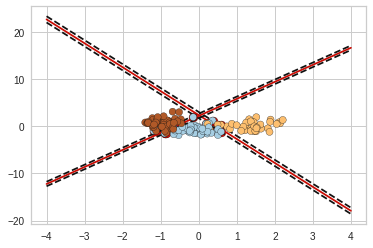

In [96]:
plt.figure()
plt.clf()
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.plot(xx1, yy1, 'r-')
plt.plot(xx1, yy_down1, 'k--')
plt.plot(xx1, yy_up1, 'k--')

#plt.plot(xx2, yy2, 'r-')
#plt.plot(xx2, yy_down2, 'k--')
#plt.plot(xx2, yy_up2, 'k--')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, zorder=1, edgecolors='k',color = 'r')
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')

### Just checking out prediction and original label

In [98]:
model.predict(X_test_std)

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 2, 1, 1, 3, 1,
       1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [99]:
y_test

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [100]:
#Assigning y_pred to the prediction of test dataset
y_pred = model.predict(X_test_std)

In [103]:
print(metrics.accuracy_score(y_test,y_pred,normalize=False), 'correctly labelled out of',X_test_std.shape[0])

58 correctly labelled out of 63


### Plotting the learning curve

In [104]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

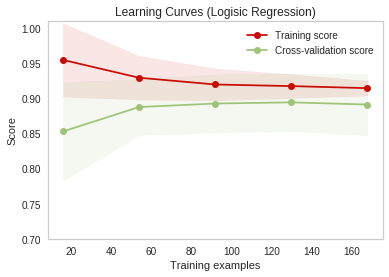

In [105]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel='linear',gamma = 1)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)



### Observation
``` As we can say from the graph of the learning curve that both training and cross-validation score are ended up around 0.91 which is good.
```

### Plotting the confusion matrix

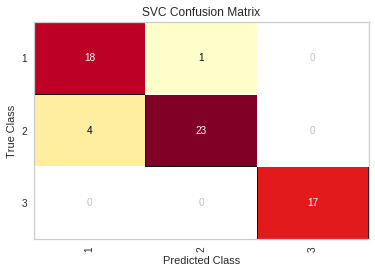

In [81]:
#Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(model, classes=[1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

** more number at diagonals that means more number of true positives**

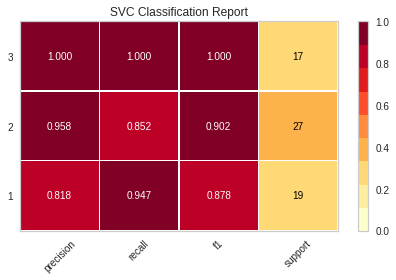

In [82]:
# Generating the classification report containing measures of precision, recall and F1-score
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()